DEUTSCH'S ALGORITHM

-1.0
The function is constant


(<Figure size 600x300 with 1 Axes>, <Axes: >)

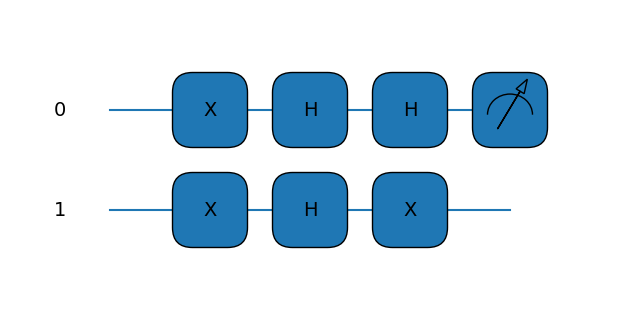

In [2]:
import pennylane as qml
import numpy as np

# Let the function be f_3 (constant function). It gives 1 for both input 0 and 1.

def deutsch1():
 qml.PauliX(wires=0) 
 qml.PauliX(wires=1)
 qml.Hadamard(wires=0)
 qml.Hadamard(wires=1)
 qml.PauliX(wires=1)
 qml.Hadamard(wires=0)
 return qml.expval(qml.PauliZ(0))
dev1=qml.device('default.qubit',wires=2,shots=1000)
circuit1=qml.QNode(deutsch1,dev1)

result=circuit1()
print (result)
if result==-1:
 print("The function is constant")
qml.draw_mpl(circuit1)()

-1.0
The function is constant


(<Figure size 600x300 with 1 Axes>, <Axes: >)

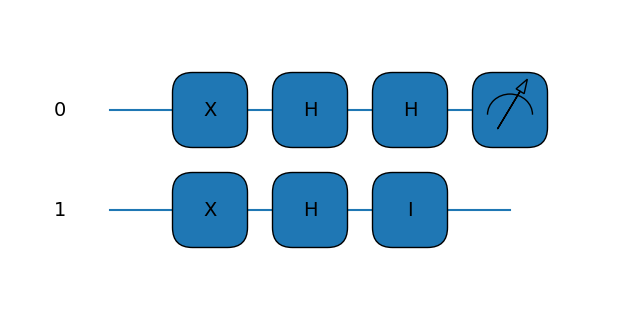

In [2]:
import pennylane as qml
import numpy as np

def deutsch2():
 qml.PauliX(wires=0)
 qml.PauliX(wires=1)
 qml.Hadamard(wires=0)
 qml.Hadamard(wires=1)
 qml.Identity(wires=1)
 qml.Hadamard(wires=0)
 return qml.expval(qml.PauliZ(0))
dev2=qml.device('default.qubit',wires=2,shots=1000)

circuit2=qml.QNode(deutsch2,dev2)
result = circuit2()
print(result)
if result==-1:
 print("The function is constant")
qml.draw_mpl(circuit2)()

1.0
The function is balanced


(<Figure size 800x300 with 1 Axes>, <Axes: >)

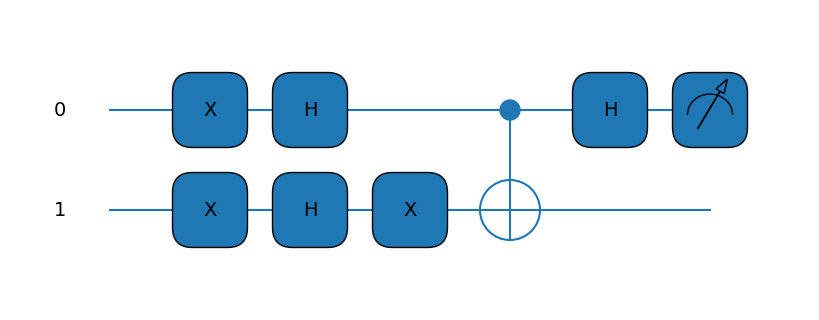

In [3]:
import pennylane as qml
import numpy as np

def deutsch3():
 qml.PauliX(wires=0)
 qml.PauliX(wires=1)
 qml.Hadamard(wires=0)
 qml.Hadamard(wires=1)
 qml.PauliX(wires=1)
 qml.CNOT(wires=[0,1])
 qml.Hadamard(wires=0)
 return qml.expval(qml.PauliZ(0))

dev3 = qml.device('default.qubit',wires=2,shots=1000)
circuit3=qml.QNode(deutsch3,dev3)

result=circuit3()
print(result)
if result==1:
 print("The function is balanced")
qml.draw_mpl(circuit3)()

1.0
The function is balanced


(<Figure size 700x300 with 1 Axes>, <Axes: >)

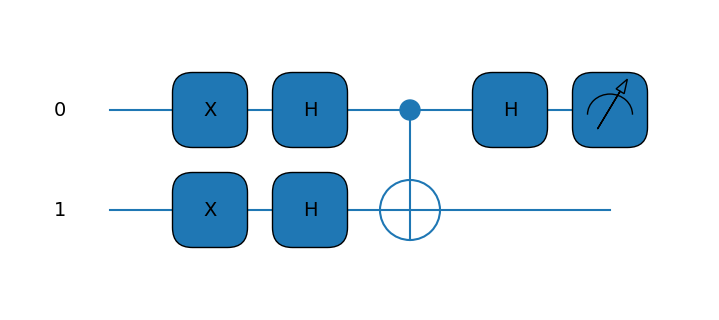

In [4]:
import pennylane as qml
import numpy as np

def deutsch4():
 qml.PauliX(wires=0)
 qml.PauliX(wires=1)
 qml.Hadamard(wires=0)
 qml.Hadamard(wires=1)
 qml.CNOT(wires=[0,1])
 qml.Hadamard(wires=0)
 return qml.expval(qml.PauliZ(0))

dev4 = qml.device('default.qubit',wires=2,shots=1000)
circuit4=qml.QNode(deutsch4,dev4)

result=circuit4()
print(result)
if result==1:
 print("The function is balanced")
qml.draw_mpl(circuit4)()

BERNSTEIN-VAZIRANI ALGORITHM

In [40]:
import pennylane as qml
import numpy as np

def U_f():
    qml.CNOT(wires=[1,3])
    qml.CNOT(wires=[2,3])
dev=qml.device('default.qubit',wires=4,shots=1)

@qml.qnode(dev)
def bernstein1():
    qml.PauliX(wires=0)
    U_f()
    return qml.sample(wires=3)
@qml.qnode(dev)
def bernstein2():
    qml.PauliX(wires=1)
    U_f()
    return qml.sample(wires=3)
@qml.qnode(dev)
def bernstein3():
    qml.PauliX(wires=2)
    U_f()
    return qml.sample(wires=3)

a1=bernstein1()
a2=bernstein2()
a3=bernstein3()

print(a1,a2,a3)
    



0 1 1


In [ ]:
BERNSTEIN-VAZIRANI PROBLEM

[1 0 1 0]


(<Figure size 800x600 with 1 Axes>, <Axes: >)

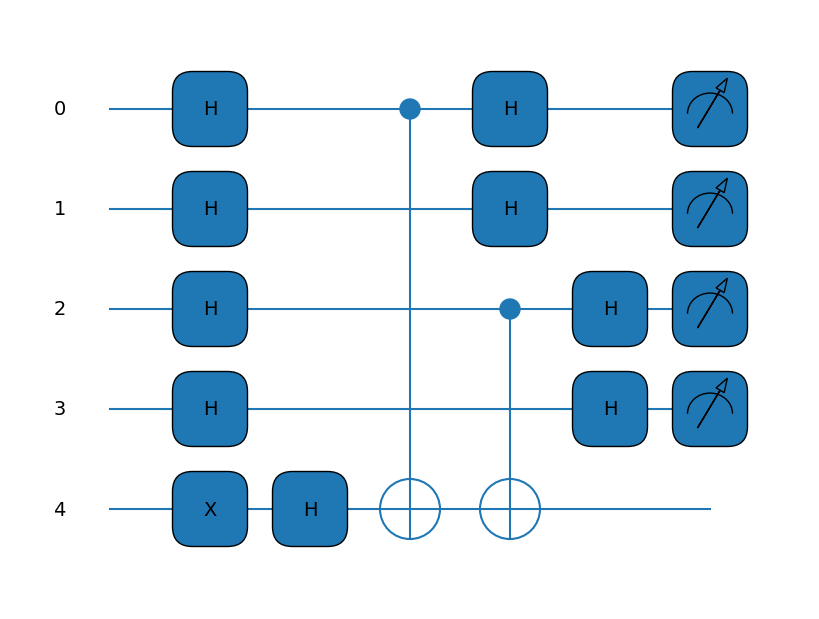

In [1]:
import pennylane as qml
import numpy as np

def uf():
    qml.CNOT(wires=[0,4])
    qml.CNOT(wires=[2,4])

def bernstein():
 qml.PauliX(wires=4)

 for i in range(5):
    qml.Hadamard(wires=i)

 uf()

 for i in range(4):
     qml.Hadamard(wires=i)

 return qml.sample(wires=range(4))

dev=qml.device('default.qubit',wires=5,shots=1)

circuit=qml.QNode(bernstein,dev)

print(circuit())

qml.draw_mpl(circuit)()

TOFFOLI GATES

-1.0


(<Figure size 900x400 with 1 Axes>, <Axes: >)

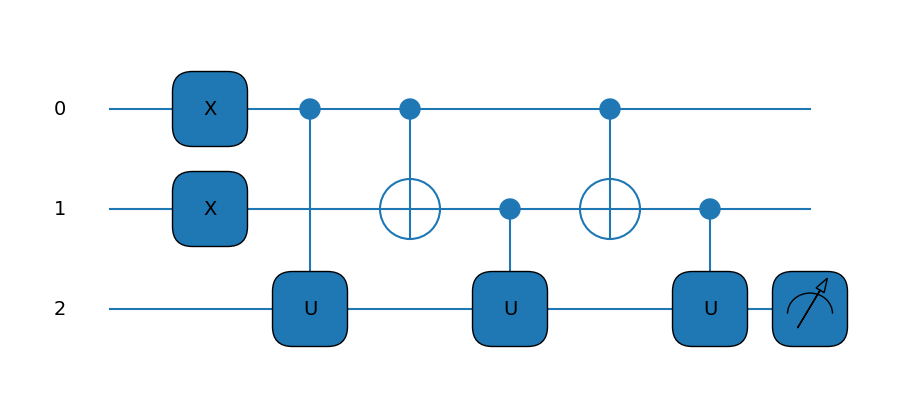

In [2]:
import pennylane as qml
import numpy as np

import numpy as np

sqrtX = 1/np.sqrt(2)*( np.array([[1, -1], [1, 1]]))
sqrtXd = np.conj(sqrtX).T


sqrtXd=np.conj(sqrtX).T
def quantumfn():
    qml.PauliX(wires=1)
    qml.PauliX(wires=0)
    qml.ControlledQubitUnitary(sqrtX,control_wires=0,wires=2)
    qml.CNOT(wires=[0, 1])
    qml.ControlledQubitUnitary(sqrtXd,control_wires=1,wires=2)
    qml.CNOT(wires=[0, 1])
    qml.ControlledQubitUnitary(sqrtX,control_wires=1,wires=2)
    return qml.expval(qml.PauliZ(2))

dev=qml.device('default.qubit',wires=3,shots=1000)

circuit=qml.QNode(quantumfn,dev)

print(circuit())

qml.draw_mpl(circuit)()